# Protein hydrophobicity

Define GES hydrophobicity scale, higher values are more hydrophobic.

In [1]:
ges_scale = {
    'F': -3.7, 'M': -3.4, 'I': -3.1, 'L': -2.8, 'V': -2.6,
	'C': -2.0, 'W': -1.9, 'A': -1.6, 'T': -1.2, 'G': -1.0,
	'S': -0.4, 'P':  0.2, 'Y':  0.7, 'H':  3.0, 'Q':  4.1,
	'N':  3.8, 'E':  8.2, 'K':  8.8, 'D':  9.2, 'R': 12.3,
}

Define a function that computes the GES hydrophobicity over a window for a given protein sequence.

In [13]:
def hydrophobicity_search(seq, scale, window=15):
    scores = [0.0]
    for acid in seq[:min(window, len(seq))]:
        scores[0] += scale[acid]
    for start_idx in range(1, len(seq) - window + 1):
        scores.append(scores[start_idx - 1])
        scores[start_idx] -= scale[seq[start_idx - 1]]
        scores[start_idx] += scale[seq[start_idx + window - 1]]
    return scores

Check the case that the sequence is shorter than the window size (default is 15).

In [14]:
hydrophobicity_search('FMI', ges_scale)

[-10.2]

Check the case that the window size is equal to the sequence length.

In [16]:
hydrophobicity_search('FMI', ges_scale, 3)

[-10.2]

For the general case, we expect sequence length - window size + 1 scores.  So for a sequence of length 2, and a window size of 3, we should get 2 scores.

In [17]:
hydrophobicity_search('FMIL', ges_scale, 3)

[-10.2, -9.299999999999999]

Check a more genral case.

In [18]:
sequence = 'FMILVCWATG'
window = 3
scores = hydrophobicity_search(sequence, ges_scale, 3)

In [19]:
len(sequence) - window + 1 == len(scores)

True

Generate a random, longer sequence, and compute its scores.

In [20]:
import random

In [23]:
sequence = random.choices(list(ges_scale), k=100)

In [24]:
scores = hydrophobicity_search(sequence, ges_scale)

Plot the scores.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

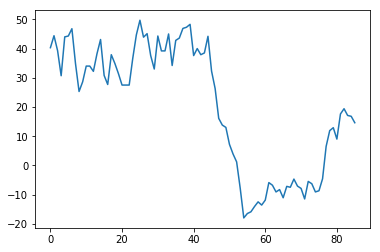

In [26]:
_ = plt.plot(scores)